<center>

## ENSE 350 – Math Programming for Software Engineers - Laboratory

# Lab 5: Iterative Methods for Root Finding on Polynomials

### University of Regina
### Faculty of Engineering and Applied Science - Software Systems Engineering
### Lab Instructor: [Adam Tilson](mailto:Adam.Tilson@uregina.ca)

### Your Name: Aryan Chandra
### Student ID: 200461690

### Objective:

In this lab we will look at iterative methods for finding roots, including Newton Raphson, Bisection and Secant. We will apply this to a polynomial as well as a non-linear function.

### Part 1: Absolute Relative Approximate Percent Error

We can calculate the error using the following formula:

$$ \epsilon_a = \displaystyle\left\lvert\frac{f(x_{old}) - f(x_{new})}{f(x_{new})  + \delta }\right\rvert \times 100 $$

Note, since are looking for roots, which are near $f(x)=0$, we'll add on a small term, $\delta$ to avoid divide-by-zero errors. 

For this lab, we'll use $\delta=0.000001$.

When the error returned is less than a certain error threshold, we may stop iterating. This will be one of our two stopping conditions, along with maximum number of iterations being exceeded.

### Part 2: Newton Raphson Method

Theory:

Given a continuous function and an initial point, we can compute the derivative at that point. Interpreting this derivative as a line, we can find the point where this line intersects with the x-axis using trigonometry. As the slope of the line follows the shape of the function, this point will be a better guess towards finding our root. After several iterations we will find a close approximation to our root.

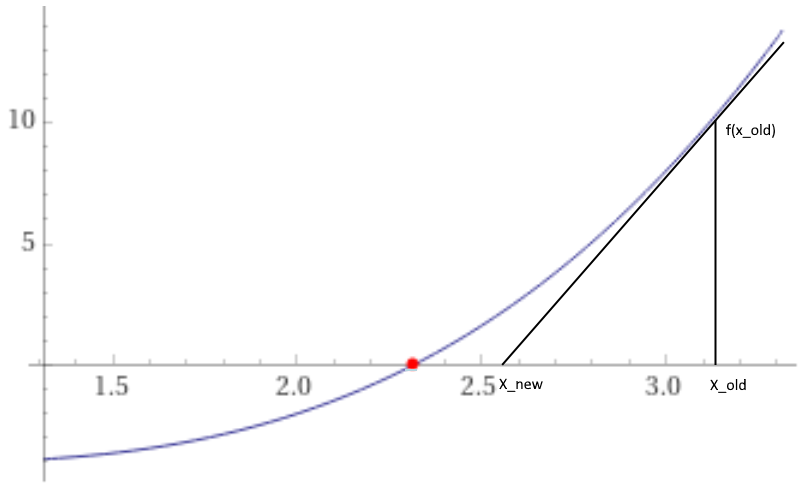

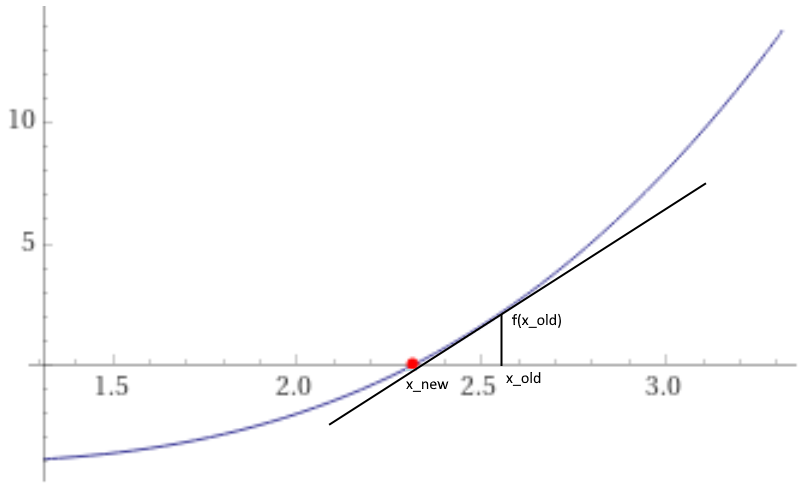

Algorithm:

Using the initial guess, compute the new guess with...

$$ x_{new} = x_{old} - \frac{f(x_{old})}{f'(x_{old})}    $$

We will stop iterating either when the computed error gets low enough, or a maximum number of iterations have elapsed.

### Part 3: Secant Method

Theory:

The secant method is a variation of the Newton Raphson method. However, rather than compute the gradient, we can use two points to simulate a gradient using the following formula:

$$ f'(x_{old}) \simeq \frac{f(x_{new}) - f(x_{old})}{ x_{new} - x_{old} } $$

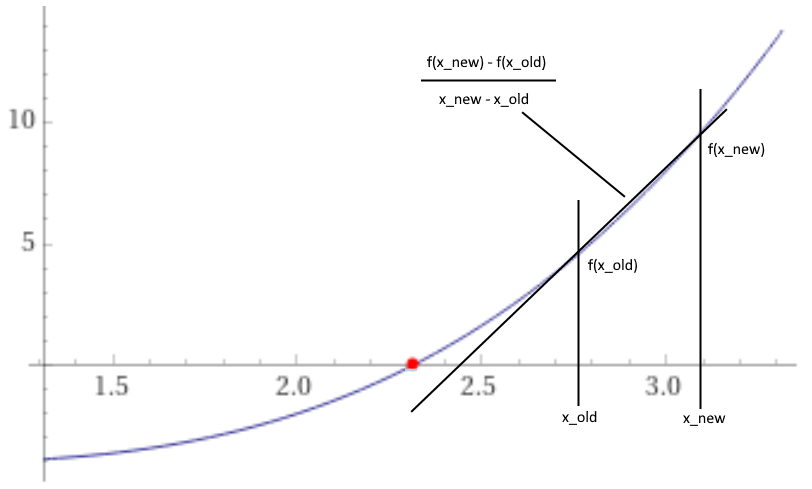

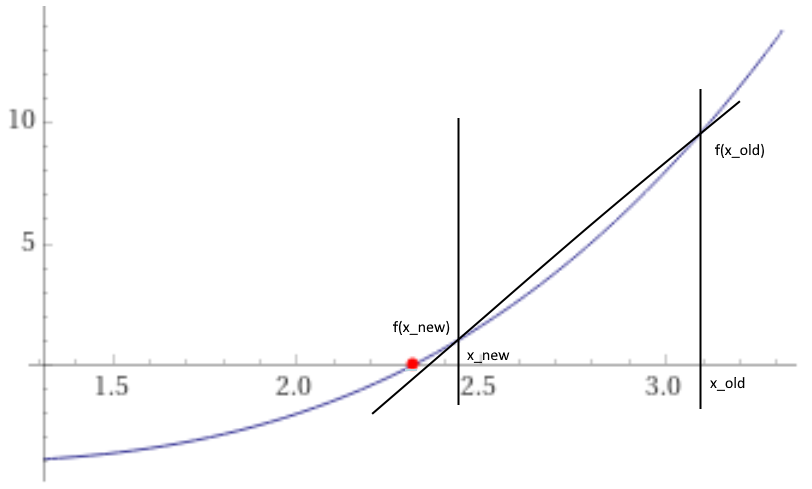

We can implement this as an algorithm such as:

$$ f'(x_{old}) \simeq \frac{f(x_{new}) - f(x_{old})}{ x_{new} - x_{old} } \tag{1} $$

$$ x_{old} \Leftarrow x_{new} \tag{2}  $$

$$ x_{new} = x_{old} - \frac{f(x_{old})}{\approx f'(x_{old})}  \tag{3} $$

Where the cached computation from (1) is used in (3), and $ x_{old} $ being updated in (2).

### Part 4: Bisection Method

Theory:

- Given a continuous function and two points on that function, one with a negative output and one with a positive output, somewhere in between must be a root, i.e. a point where the function crosses 0. We can essentially find it through binary search, by continually dividing our search space in half and updating our bounds depending on the value at the midpoint.

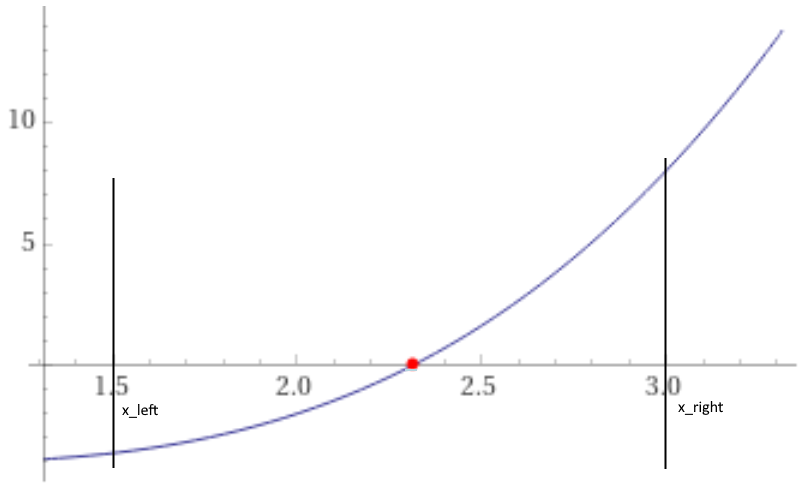

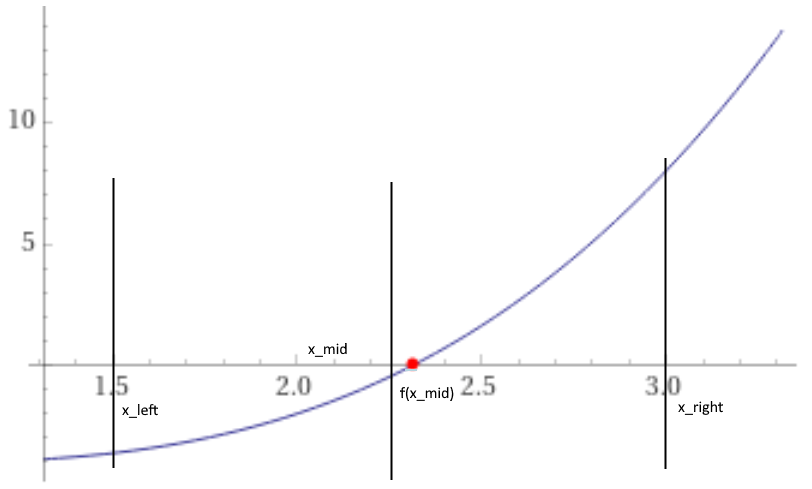

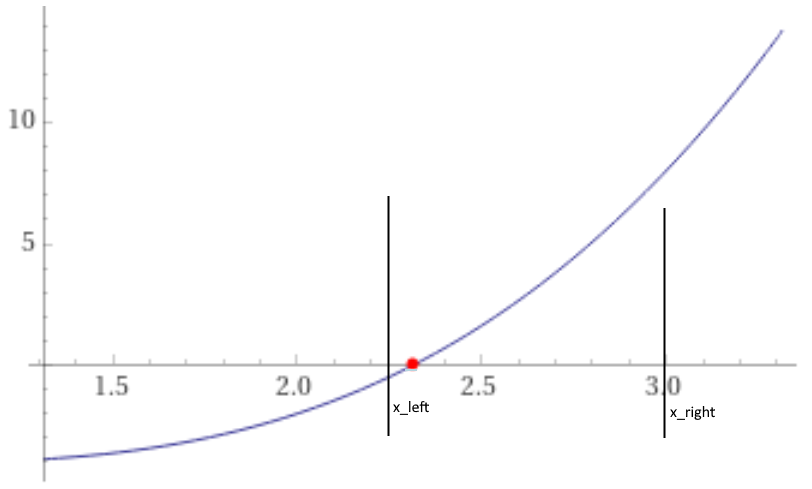

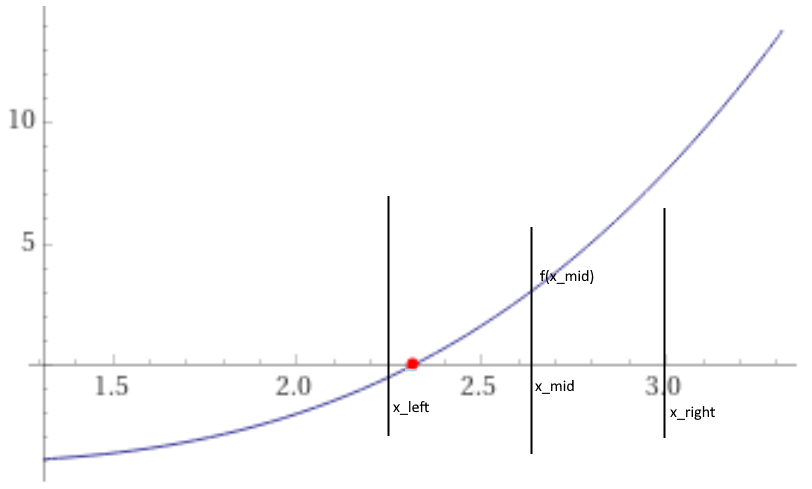

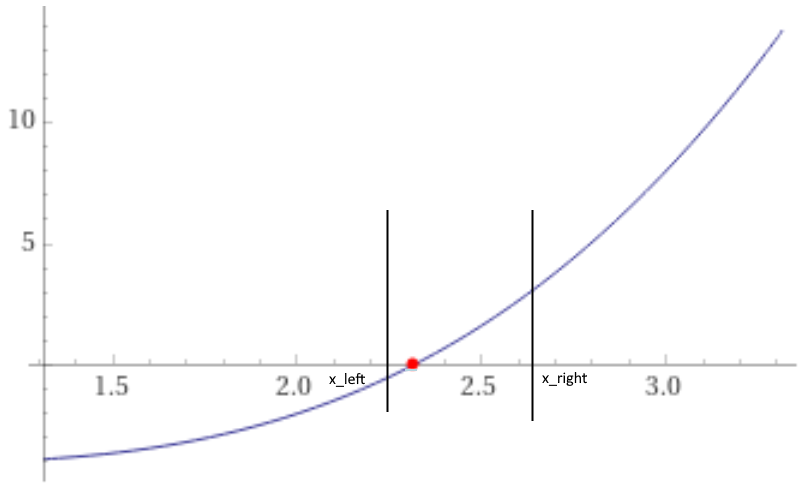

Algorithm:
   
1. Choose two points which bisect a solution. One must be positive and the other negative.

2. Determine if the function is rising or falling, e.g. is $ f(x_{left}) $ negative or positive?

3. Compute the midpoint

$$ x_{midpoint} = \displaystyle\frac{x_{left} + x_{right}}{2} $$

4. Update the terms. There are four possibilities:

- Is $f(x_{midpoint})$ negative?
    - If rising:
        - Set $x_{left}$ to $x_{midpoint}$
    - If falling:
        - Set $x_{right}$ to $x_{midpoint}$
        
- Is $f(x_{midpoint})$ positive?
    - If rising:
        - Set $x_{right}$ to $x_{midpoint}$
    - If falling:
        - Set $x_{left}$ to $x_{midpoint}$
    
5. Compute $ \epsilon_a $ using the  $ x_{midpoint} $ and check the stopping conditions.

### Part 5: Polynomial Class and Iterative Solvers

In this section we will define a polynomial class. An instance of this class represents a polynomial of the form

$$ Ax^n + Bx^{n-1} + ... + Yx + Z $$

We will create this using a constructor which takes a list of coefficients. This syntax may seem familiar if you have ever used MATLAB or Octave.

The class will have the following public functions:

|polynomial|
|:--- |
|+ \_\_init\_\_ (list_of_coefficients)|
|+ print_polynomial()|
|+ print_first_derivative()|
|+ evaluate (x)|
|+ evaluate_first_derivative (x)|
|+ find_root_newton_raphson(initial_guess, min_error, max_iterations)|
|+ find_root_secant(x_new, x_old, min_error, max_iterations)|
|+ find_root_bisection(x_left, x_right, min_error, max_iterations)|

In [34]:
class polynomial:
    """
    >>> poly = polynomial([-3, 2, 0, -1])
    >>> poly.print_polynomial()
    -3x^3 + 2x^2 - 1

    >>> poly = polynomial([-1, 1, -1])
    >>> poly.print_polynomial()
    -x^2 + x - 1

    >>> poly = polynomial([1, 1])
    >>> poly.print_polynomial()
    x + 1
    
    >>> poly = polynomial([-1])
    >>> poly.print_polynomial()
    -1

    >>> poly = polynomial([230, 18, 9, -221, -9])
    >>> poly.print_polynomial()
    230x^4 + 18x^3 + 9x^2 - 221x - 9
    
    >>> poly.print_first_derivative()
    920x^3 + 54x^2 + 18x - 221
    
    >>> poly.evaluate(3)
    18525
    
    >>> poly.evaluate_first_derivative(3)
    25159
    
    >>> poly.__get_error__(3,4)
    220.0161943201071
    
    >>> print(poly.find_root_newton_raphson(3, 0.001, 100))
    Root found in 10 iterations.
    0.9623984187505414
  
    >>> print(poly.find_root_newton_raphson(-3, 0.001, 100))
    Root found in 10 iterations.
    -0.04065928831575886

    >>> print(poly.find_root_bisection(-1,0,0.0001, 100))
    Root found in 48 iterations.
    -0.040659288315762154
 
    >>> print(poly.find_root_bisection(0,1,0.0001, 100))    
    Root found in 50 iterations.
    0.9623984187505412

    >>> print(poly.find_root_secant(-1,0,0.0001, 100))
    Root found in 6 iterations.
    -0.04065928831575886

    >>> print(poly.find_root_secant(1,2,0.0001, 100))
    Root found in 7 iterations.
    0.9623984187505414
    """

    # the following functions we will implement together in the pre-lab

    def __init__ (self, list_of_coefficients):
        ''' Creates a polynomial instance from a `list_of_coefficients` in 
                descending order, i.e. MATLAB-style, 
                e.g. [1, -4, 4] => x^2 -4x + 4
            Store the coefficients in ascending order so that the list index 
                matches the power on x, to facilitate computations
                e.g. x^3 + 3x + 4 => [4, 3, 0, 1]
                e.g. index 3 references the coefficient on x^3
                e.g. index 0 references the coefficient on x^0, 
                    i.e. the constant term '''
        list_of_coefficients.reverse()
        self.coefficients = list_of_coefficients
        self.first_derivative_coefficients = self.__compute_derivative_coefficients__ ()
           
    def __evaluate_helper__ (self, coefficients, x):
        ''' Private helper function to assist in evaluating polynomials.
            For some x, evaluate the polynomial for the given set of 
            coefficients, i.e., plug in the provided value for x and 
            return the function value f(x)!
            e.g. for the polynomial f(x) = x^2 - x + 1, x=3
                f(3) = 3^2 - 3 + 1 = 9 - 3 + 1 = 7           
        '''
        accumulator = 0
        for power in range(len(coefficients)):
            accumulator += coefficients[power] * x ** power
        return accumulator        
    
    def evaluate (self, x):
        ''' For some x, computes f(x), using the stored coefficients '''
        return self.__evaluate_helper__ (self.coefficients, x)
    
    # The following functions you will implement in the lab
   
    def __compute_derivative_coefficients__ (self):
        ''' Computes the list `self.first_derivative_coefficients` for the 
                polynomial, from `self.coefficients`.
            Store the list in the same format as `self.coefficients`.
            Hint 1: the derivative of the term ax^b = (ab)x^(b-1)
            Hint 2: the derivative of the constant term is 0, which does not
                need to be stored in the list, so the derivative list will 
                be shorter that the coefficient list by 1 number.
        '''
        
        # your code here!

        derivative_coefficients = []
        for i in range(1, len(self.coefficients)):
            derivative_coefficients.append(i * self.coefficients[i])

        return derivative_coefficients
        pass
    
    def evaluate_first_derivative (self, x):
        ''' For some x, computes f'(x), using the stored 
            derivative coefficients '''
        # your code here!
        # hint - follow the example in `evaluate`

        return self.__evaluate_helper__(self.first_derivative_coefficients, x)
        pass
    
    def __get_error__(self, x_new, x_old):
        ''' Computes the Percent Absolute Relative Approximate Error,
            between two points, x_new and x_old, by evaluating them as
            f(x_new) and f(x_old), described in the markdown cell below.
            Note: We will add on a small term `delta=0.000001` to the 
            denominator for numerical stability.
            '''
        
        # your code here!
        delta = 0.000001
        fNew = self.evaluate(x_new)
        fOld = self.evaluate(x_old)
        error = abs((fNew - fOld) / (fNew + delta)) * 100
        return error
        pass

    def find_root_newton_raphson(self, initial_guess, min_error, max_iterations):
        ''' Returns a root, x_n, of the polynomial using the iterative 
            Newton-Raphson method, described in the markdown cell below.
            Parameters:
                initial_guess: the initial guess for Newton-Raphson, x_0
                min_error: one of the two stopping conditions. Once the 
                    percent absolute relative approximate error of two
                    successive estimates is below this threshold, stop!
                max_iterations: one of the two stopping conditions. If the
                    number of iterations exceeds this value, stop!
        '''
        error = 1
        iterations = 0
        x_new = initial_guess
        x_old = initial_guess
       
        # your code here!
        
        while error > min_error and iterations < max_iterations: 
            iterations += 1
            fOld = self.evaluate(x_old)
            fPrimeOld = self.evaluate_first_derivative(x_old)
            x_new = x_old - (fOld / fPrimeOld)
            error = self.__get_error__(x_new, x_old)
            x_old = x_new

        print ("Root found in " + str(iterations) + " iterations.")
        return x_new

    def find_root_secant(self, x_new, x_old, min_error, max_iterations):
        ''' Returns a root, x_n, of the polynomial using the iterative 
            secant method, described below.
            Parameters:
                x_new: the newer of the two initial guesses for secant, x_1
                x_old: the older of the two initial guesses for secant, x_0
                min_error: one of the two stopping conditions. Once the 
                    percent absolute relative approximate error of two
                    successive estimates is below this threshold, stop!
                max_iterations: one of the two stopping conditions. If the
                    number of iterations exceeds this value, stop!
        '''
        error = 1
        iterations = 0
        
        # your code here!
        
        while error > min_error and iterations < max_iterations: 
            iterations += 1
            fOld = self.evaluate(x_old)
            fNew = self.evaluate(x_new)
            fPrimeOld = (fNew - fOld) / (x_new - x_old)
            x_old = x_new
            fOld = self.evaluate(x_old)
            x_new = x_old - (fOld / fPrimeOld)
            error = self.__get_error__(x_new, x_old)

        print ("Root found in " + str(iterations) + " iterations.")
        return x_new


    def find_root_bisection(self, x_left, x_right, min_error, max_iterations):
        ''' Returns a root, x_n, of the polynomial using the iterative 
            bisection method, described below.
            Parameters:
                x_left: the initial left guess
                x_right: the initial right guess
                    x_left and x_right must bracket a solution!
                min_error: one of the two stopping conditions. Once the 
                    percent absolute relative approximate error of two
                    successive estimates is below this threshold, stop!
                    Remember - the x's we are tracking are the midpoints!
                max_iterations: one of the two stopping conditions. If the
                    number of iterations exceeds this value, stop!
        '''
        error = 1
        iterations = 0           
        x_midpoint = 0
        x_old_midpoint = x_midpoint
        
        # your code here!
            
        while (error > min_error and iterations < max_iterations): 
            iterations += 1
            x_midpoint = (x_left + x_right) / 2
            fMidpoint = self.evaluate(x_midpoint)
            fLeft = self.evaluate(x_left)

            if(fMidpoint < 0):
                if(fLeft < 0):
                    x_left = x_midpoint
                else:
                    x_right = x_midpoint
            else:
                if(fLeft < 0):
                    x_right = x_midpoint
                else:
                    x_left = x_midpoint

            
            error = self.__get_error__(x_midpoint, x_old_midpoint)
            x_old_midpoint = x_midpoint

        print ("Root found in " + str(iterations) + " iterations.")
        return x_midpoint
                
    # The following functions are provided by Adam to help you debug.
    # You only need use the public facing functions:
    #    self.print_polynomial()
    #    self.polyprint_polynomial()

    def __print_helper__(poly_coefficients):
        ''' Helper function to print a list of coefficients in a 
            human-readable format
        '''
        # Accounts for...
        #    - missing terms
        #    - leading negative
        #    - correct sign
        #    - printing cx^1 as cx, and cx^0 as c
        #    - 1's / -1s only appear as constants
        #    - if you find anything wrong with it, let me know!
        
        def __print_sign_helper_first__ (coefficient):
            output = ""
            if coefficient < 0:
                output += "-"
            return output

        def __print_sign_helper__ (coefficient):
            output = ""
            if coefficient < 0:
                output += " - "
            else: 
                output += " + "
            return output

        def __print_coefficient_helper__ (coefficient, power):
            output = ""
            if power == 0 and (coefficient == 1 or coefficient == -1):
                output += "1"
            if coefficient != 1 and coefficient != -1:
                output += str(abs(coefficient))
            return output

        def __print_power_helper__ (power):
            output = ""
            if power == 1:
                output += "x"
            elif power > 1:
                output += "x^" + str(power)
            return output
        
        output = ""
        output += __print_sign_helper_first__(poly_coefficients[-1])
        output += __print_coefficient_helper__(poly_coefficients[-1], len(poly_coefficients)-1)
        output += __print_power_helper__(len(poly_coefficients)-1)
        
        for power in reversed(range(len(poly_coefficients)-1)):
            if poly_coefficients[power] != 0:
                output += __print_sign_helper__(poly_coefficients[power])
                output += __print_coefficient_helper__(poly_coefficients[power], power)
                output += __print_power_helper__(power)       
        print(output)
    
    def print_polynomial(self):
        polynomial.__print_helper__(self.coefficients)
       
    def print_first_derivative(self):
        polynomial.__print_helper__(self.first_derivative_coefficients)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=20)

### Part 6: Comparison and Exploration

Run the following cell to create a polynomial object, and then run the following cells to compare the performance between the three methods to find one root. Which one computes the quickest? Why?

Newton Raphson runs the quickest with 637 us +- 3.7 us per loop because it converges to the root must quicker than the other two. Since it uses the tangent line of the function at the current guess to find a new guess which is closest to the root, this makes it quicker. 

In [35]:
poly = polynomial([230, 18, 9, -221, -9])   

In [36]:
%%timeit
%%capture
poly.find_root_newton_raphson(-1, 0.01, 100)

637 µs ± 3.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
%%timeit
%%capture
poly.find_root_bisection(-1,0,0.01, 100)

778 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
%%timeit
%%capture
poly.find_root_secant(-1,0,0.01, 100)

677 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Using your class and any implemented methods, find the three real roots for the following polynomial

$$ 5 x^5 - 172 x^4  + 530 x^3 + 887 x + 425 $$

__Please note the missing square term!__

In [70]:
# your code here!
poly = polynomial([5, -172, 530, 0, 887, 425])   
print(poly.find_root_newton_raphson(1, 0.0001, 100))
print(poly.find_root_newton_raphson(17, 0.0001, 100))
print(poly.find_root_newton_raphson(100, 0.0001, 100))

Root found in 7 iterations.
-0.42634933318485774
Root found in 11 iterations.
3.904345831608842
Root found in 14 iterations.
30.97142689568487


### Part 7: Application

You may use any of the methods previously defined to solve this problem:

A total charge $Q$ is uniforemly distributed around a ring-shaped conductor with radius $a$. A charge $q$ is located at a distance $x$ from the center of the ring. The force exerted on the charge by the ring is given by:

$$ F = \frac {1}{4\pi e_0} \frac {qQx}{(x^2+a^2)^{3/2}}$$ 

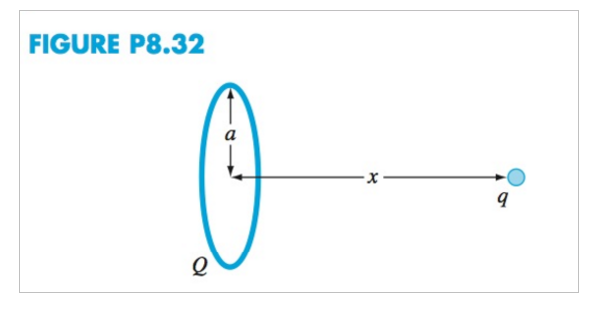

where $ e_0 = 8.85 \times 10 ^ -12 \frac{C^2}{N m^2} $.
Find the distance $x$ whre the force, $F$,  is $1N$ if $q$ and $Q$ are $2 \times 10^-5 C $ for a ring with a radius of $0.9 m$.


Acknowledgement: From `Numerical Methods for Engineers, 7th Edition. By Steven Chapra and Raymond Canale. McGraw-Hill Higher Education`

Hint: Let $ b $ = $ \frac{qQ}{4\pi e_0} $; Solve for $ F=1 $

In [109]:
# your code here!
from math import pi
b = (2*10**-5 * 2*10**-5) / (4  * pi * 8.85*10**-12)
a = 0.9
poly = polynomial([1, 0, 3*a**2, 0, (3*a**4) - (b**2), 0, a**6])   
print(poly.find_root_newton_raphson(2, 0.0001, 100))

Root found in 7 iterations.
1.5097851406991014
